In [ ]:
import pandas as pd
df=pd.read_csv("/content/Order Flow Compiled(Sheet1) (1).csv")

In [ ]:
df.head()

,sale_order_code,order_number,order_date,packing_date,invoice_number,product_sku_code,order_item_status,promised_delivery_date,actual_delivery_date,return_date,...,cart_discount,coupon_discount,seller_gstn,seller_name,seller_state_code,additional_amount,postpaid_amount_other,prepaid_amount_other,myntra_gstn,party_id_to
0,7941050574,1.269060e+20,2024-06-01T01:28:14.000+05:30,6/1/2024 10:39,I0725SY000002529,MLHASKWR95280006,reverse_in_transit,6/3/2024 11:59,6/3/2024 1:36,6/3/2024 0:00,...,0.0,0,07AAMPM7556K1Z1,STEP BY STEP CREATIONS,DL,0,0,0,29AAECM9636P1ZJ,9290
1,7944929066,1.269190e+20,2024-06-02T11:54:17.000+05:30,6/3/2024 10:37,I0725SY000002613,MLHASRBL94164950,delivered,6/8/2024 11:59,6/8/2024 18:53,NaN,...,0.0,0,07AAMPM7556K1Z1,STEP BY STEP CREATIONS,DL,0,0,0,29AAECM9636P1ZJ,9290
2,7946157876,1.269210e+20,2024-06-02T18:18:23.000+05:30,6/3/2024 10:27,I0725SY000002585,MLHASHRT86864920,delivered,6/6/2024 11:59,6/5/2024 17:44,NaN,...,0.0,0,07AAMPM7556K1Z1,STEP BY STEP CREATIONS,DL,0,0,0,29AAECM9636P1ZJ,9290
3,7952471001,1.269460e+20,2024-06-05T14:51:40.000+05:30,6/5/2024 17:57,I0725SY000002686,MLHASRBL59426346,delivered,6/11/2024 11:59,6/12/2024 17:53,NaN,...,0.0,194,07AAMPM7556K1Z1,STEP BY STEP CREATIONS,DL,194,0,0,29AAECM9636P1ZJ,9290
4,7956717162,1.269640e+20,2024-06-07T16:07:18.000+05:30,6/7/2024 18:08,I0725SY000002739,MLHADRSS66970826,delivered,6/10/2024 11:59,6/10/2024 1:49,NaN,...,0.0,0,07AAMPM7556K1Z1,STEP BY STEP CREATIONS,DL,0,0,0,29AAECM9636P1ZJ,9290


In [ ]:
df.columns

Index(['sale_order_code', 'order_number', 'order_date', 'packing_date',
       'invoice_number', 'product_sku_code', 'order_item_status',
       'promised_delivery_date', 'actual_delivery_date', 'return_date',
       'restocked_date', 'return_type', 'promised_settlement_date', 'currency',
       'customer_paid_amount', 'postpaid_amount', 'prepaid_amount', 'mrp',
       'discount_amount', 'shipping_case', 'tax_rate', 'igst_amount',
       'cgst_amount', 'sgst_amount', 'tcs_igst_amt', 'tcs_sgst_amt',
       'tcs_cgst_amt', 'minimum_commission', 'commission_pct',
       'commission_total_amount', 'e_commerce_portal_name', 'hsn',
       'product_tax_category', 'brand', 'gender', 'article_type',
       'supply_type', 'is_try_and_buy', 'tracking_no', 'customer_name',
       'customer_pincode', 'customer_state', 'igst_rate', 'cgst_rate',
       'sgst_rate', 'taxable_amount', 'tcs_igst_rate', 'tcs_sgst_rate',
       'tcs_cgst_rate', 'shipping_amount', 'gift_amount', 'cart_discount',
       'co

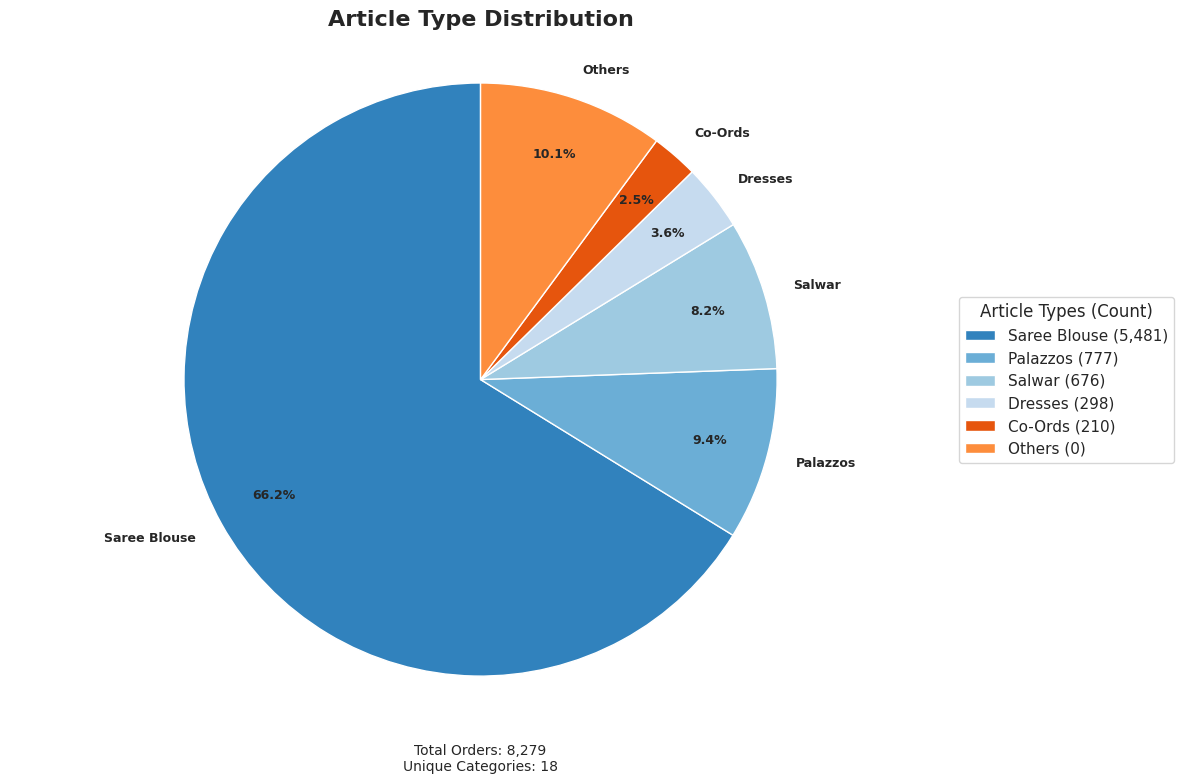

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate article type distribution
article_counts = df['article_type'].value_counts()
total_orders = len(df)
article_percentages = (article_counts / total_orders) * 100

# Group small categories (<2%) into "Others"
threshold = 2
main_categories = article_percentages[article_percentages >= threshold]
other_percentage = article_percentages[article_percentages < threshold].sum()

# Combine using concat instead of append
combined_data = pd.concat([
    main_categories,
    pd.Series({'Others': other_percentage})
])

# Generate pie chart
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20c(np.arange(len(combined_data)) )

# Plot with custom settings
wedges, texts, autotexts = plt.pie(
    combined_data,
    labels=combined_data.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    textprops={'fontsize': 9, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'w', 'linewidth': 1}
)

# Enhance title and layout
plt.title('Article Type Distribution', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Ensure circular shape

# Add annotations
plt.annotate(f'Total Orders: {total_orders:,}\nUnique Categories: {len(article_counts)}',
             xy=(0.5, -0.1),
             ha='center',
             fontsize=10,
             xycoords='axes fraction')

# Create legend with counts
legend_labels = [f"{label} ({article_counts.get(label, 0):,})"
                for label in combined_data.index]
plt.legend(wedges, legend_labels,
          title="Article Types (Count)",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          frameon=True)

plt.tight_layout()
plt.show()

In [ ]:
df=df.drop(columns=['sale_order_code','invoice_number','restocked_date','promised_settlement_date','currency','e_commerce_portal_name','brand','hsn','igst_rate','cgst_rate', 'sgst_rate'])

In [ ]:
df['order_item_status'].unique()

array(['reverse_in_transit', 'delivered', 'in_transit'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Fix date columns first
date_columns = ['order_date', 'packing_date', 'promised_delivery_date',
                'actual_delivery_date', 'return_date']

for col in date_columns:
    if col in df.columns:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.split('+').str[0]
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date columns converted successfully")

# Create flags and metrics for profit analysis
# Return flag
df['is_returned'] = df['return_date'].notna()

# Basic profit calculation (before accounting for returns)
df['basic_profit'] = df['customer_paid_amount'] - df['commission_total_amount']

Date columns converted successfully


In [ ]:
# Calculate return-related costs
# Shipping costs lost for returns
df['return_shipping_cost'] = np.where(df['is_returned'],
                                     df['shipping_amount'].fillna(50), # Use actual shipping or default to 50
                                     0)

# Potential restocking/handling costs for returns (typically 10-15% of item value)
df['return_handling_cost'] = np.where(df['is_returned'],
                                     df['customer_paid_amount'] * 0.15, # 15% handling cost
                                     0)

# Lost revenue from returns (if refunded)
df['lost_revenue'] = np.where(df['is_returned'] & (df['return_type'] == 'return_refund'),
                             df['customer_paid_amount'],
                             0)

# Tax loss on returns (TCS components)
df['tax_loss'] = np.where(df['is_returned'] & (df['return_type'] == 'return_refund'),
                         df['tcs_igst_amt'] + df['tcs_sgst_amt'] + df['tcs_cgst_amt'],
                         0)

# Calculate true net profit including tax losses
df['net_profit'] = df['basic_profit'] - df['return_shipping_cost'] - df['return_handling_cost'] - df['lost_revenue'] - df['tax_loss']

print("Profit metrics calculated successfully")

Profit metrics calculated successfully



===== PROFITABILITY OVERVIEW =====
Total Revenue: ₹9,275,502.28
Total Commission Costs: ₹2,299,959.64
Basic Profit (before returns): ₹6,975,542.64

Return Cost Breakdown:
- Return Shipping Costs: ₹0.00
- Return Handling Costs: ₹727,448.58
- Lost Revenue: ₹3,392,941.84
- Tax Losses (TCS): ₹17,896.76
Total Return-related Costs: ₹4,138,287.18

Net Profit (after returns): ₹2,837,255.46

Basic Profit Margin: 75.20%
Net Profit Margin (after returns): 30.59%
Margin Reduction Due to Returns: 44.62%


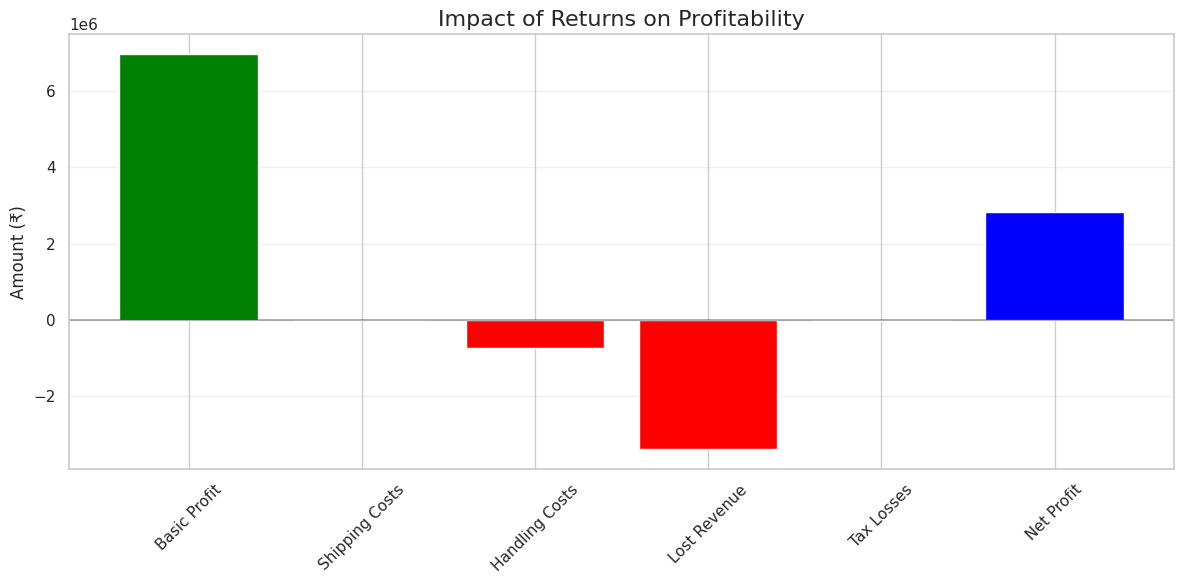

In [ ]:
# Basic profitability overview
print("\n===== PROFITABILITY OVERVIEW =====")
print(f"Total Revenue: ₹{df['customer_paid_amount'].sum():,.2f}")
print(f"Total Commission Costs: ₹{df['commission_total_amount'].sum():,.2f}")
print(f"Basic Profit (before returns): ₹{df['basic_profit'].sum():,.2f}")

# Break down return costs
return_shipping_total = df['return_shipping_cost'].sum()
return_handling_total = df['return_handling_cost'].sum()
lost_revenue_total = df['lost_revenue'].sum()
tax_loss_total = df['tax_loss'].sum()
total_return_cost = return_shipping_total + return_handling_total + lost_revenue_total + tax_loss_total

print(f"\nReturn Cost Breakdown:")
print(f"- Return Shipping Costs: ₹{return_shipping_total:,.2f}")
print(f"- Return Handling Costs: ₹{return_handling_total:,.2f}")
print(f"- Lost Revenue: ₹{lost_revenue_total:,.2f}")
print(f"- Tax Losses (TCS): ₹{tax_loss_total:,.2f}")
print(f"Total Return-related Costs: ₹{total_return_cost:,.2f}")

print(f"\nNet Profit (after returns): ₹{df['net_profit'].sum():,.2f}")

# Calculate profit margins
basic_margin = (df['basic_profit'].sum() / df['customer_paid_amount'].sum()) * 100
net_margin = (df['net_profit'].sum() / df['customer_paid_amount'].sum()) * 100

print(f"\nBasic Profit Margin: {basic_margin:.2f}%")
print(f"Net Profit Margin (after returns): {net_margin:.2f}%")
print(f"Margin Reduction Due to Returns: {basic_margin - net_margin:.2f}%")

# Visualize the impact of returns on profit
return_impact = [
    df['basic_profit'].sum(),
    -return_shipping_total,
    -return_handling_total,
    -lost_revenue_total,
    -tax_loss_total,
    df['net_profit'].sum()
]

labels = ['Basic Profit', 'Shipping Costs', 'Handling Costs', 'Lost Revenue', 'Tax Losses', 'Net Profit']

plt.figure(figsize=(12, 6))
plt.bar(labels, return_impact, color=['green', 'red', 'red', 'red', 'red', 'blue'])
plt.title('Impact of Returns on Profitability', fontsize=16)
plt.ylabel('Amount (₹)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


===== RETURN ANALYSIS =====
Overall Return Rate: 52.01%
Total Cost of Returns: ₹4,138,287.18
Average Cost per Return: ₹961.05
Tax Losses as Percentage of Return Costs: 0.43%


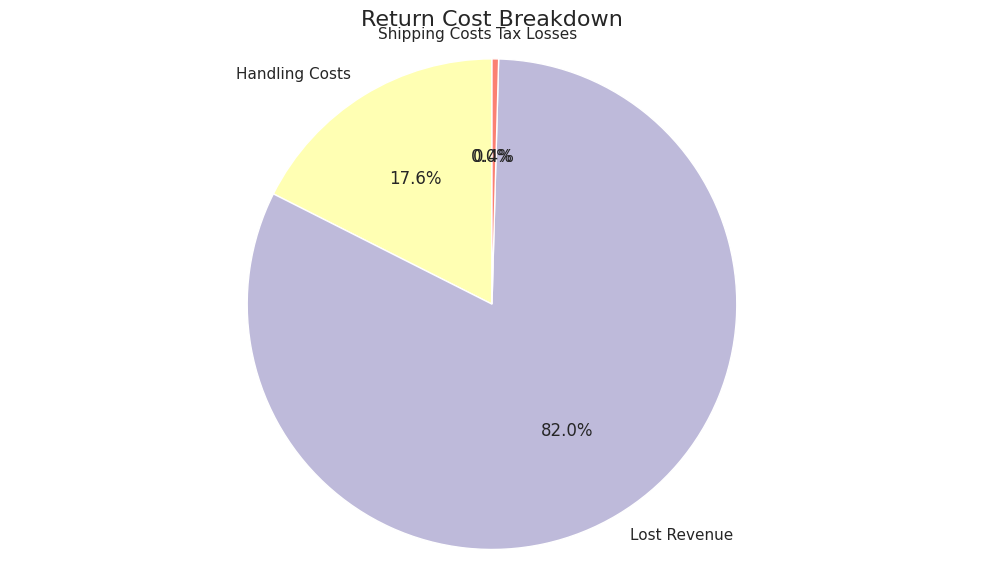

In [ ]:
# Return rate analysis
return_rate = df['is_returned'].mean() * 100
print(f"\n===== RETURN ANALYSIS =====")
print(f"Overall Return Rate: {return_rate:.2f}%")
print(f"Total Cost of Returns: ₹{total_return_cost:,.2f}")
print(f"Average Cost per Return: ₹{total_return_cost/df['is_returned'].sum():,.2f}")

# Tax component as percentage of return costs
tax_percentage = (tax_loss_total / total_return_cost) * 100
print(f"Tax Losses as Percentage of Return Costs: {tax_percentage:.2f}%")

# Visualize return cost breakdown
return_cost_breakdown = [return_shipping_total, return_handling_total, lost_revenue_total, tax_loss_total]
return_cost_labels = ['Shipping Costs', 'Handling Costs', 'Lost Revenue', 'Tax Losses']

plt.figure(figsize=(10, 6))
plt.pie(return_cost_breakdown, labels=return_cost_labels, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"))
plt.title('Return Cost Breakdown', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


===== MOST PROFITABLE CATEGORIES =====
                 revenue  net_profit  net_margin  return_rate  tax_impact  \
article_type                                                                
Cushion Covers  31110.14    21543.02       69.25        12.16        0.05   
Earrings         2995.00     1596.42       53.30        20.00        0.10   
Churidar       220479.78   104517.25       47.40        30.91        0.11   
Kurtas          11412.04     5120.60       44.87        33.33        0.12   
Shirts         152503.26    62423.34       40.93        45.10        0.16   
Salwar         783294.98   319624.47       40.81        44.53        0.15   
Trousers        32819.99    12692.07       38.67        39.29        0.19   
Palazzos       826812.55   306630.60       37.09        44.27        0.18   
Dresses        425223.54   130313.56       30.65        48.32        0.22   
Harem Pants    122062.27    35423.02       29.02        45.28        0.23   

                order_count  
artic

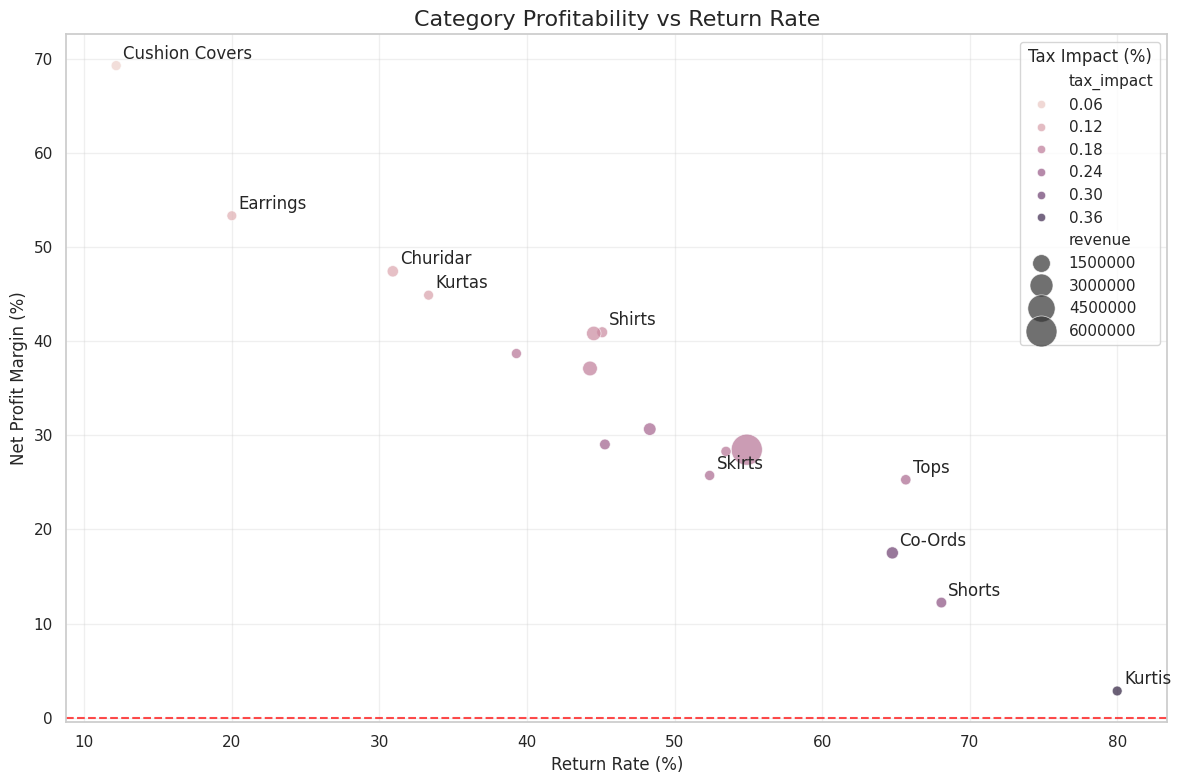

In [ ]:
# Profitability by product category
category_profit = df.groupby('article_type').agg({
    'customer_paid_amount': 'sum',
    'basic_profit': 'sum',
    'net_profit': 'sum',
    'is_returned': lambda x: x.mean() * 100,
    'tax_loss': 'sum',
    'order_number': 'count'
}).rename(columns={
    'customer_paid_amount': 'revenue',
    'is_returned': 'return_rate',
    'order_number': 'order_count'
})

# Calculate profit margins by category
category_profit['basic_margin'] = (category_profit['basic_profit'] / category_profit['revenue']) * 100
category_profit['net_margin'] = (category_profit['net_profit'] / category_profit['revenue']) * 100
category_profit['margin_impact'] = category_profit['basic_margin'] - category_profit['net_margin']
category_profit['tax_impact'] = (category_profit['tax_loss'] / category_profit['revenue']) * 100

# Filter to categories with significant volume
significant_categories = category_profit[category_profit['order_count'] >= 5].sort_values('net_margin', ascending=False)

print("\n===== MOST PROFITABLE CATEGORIES =====")
print(significant_categories.head(10)[['revenue', 'net_profit', 'net_margin', 'return_rate', 'tax_impact', 'order_count']])

print("\n===== LEAST PROFITABLE CATEGORIES =====")
print(significant_categories.tail(10)[['revenue', 'net_profit', 'net_margin', 'return_rate', 'tax_impact', 'order_count']])

# Visualize categories by profitability and return rate
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=significant_categories.reset_index(),
                x='return_rate', y='net_margin',
                size='revenue', sizes=(50, 500),
                alpha=0.7, hue='tax_impact')

plt.title('Category Profitability vs Return Rate', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.legend(title='Tax Impact (%)')

# Annotate some key categories
for idx, row in significant_categories.head(5).reset_index().iterrows():
    plt.annotate(row['article_type'],
                 xy=(row['return_rate'], row['net_margin']),
                 xytext=(5, 5), textcoords='offset points')

for idx, row in significant_categories.tail(5).reset_index().iterrows():
    plt.annotate(row['article_type'],
                 xy=(row['return_rate'], row['net_margin']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Print with fixed width formatting for copying
print(f"{'Article Type':<20} {'Revenue':<15} {'Net Profit':<15} {'Margin %':<10} {'Return %':<10} {'Tax %':<10}")
print("-"*80)

for index, row in significant_categories.reset_index().iterrows():
    print(f"{row['article_type']:<20} {row['revenue']:<15.2f} {row['net_profit']:<15.2f} {row['net_margin']:<10.2f} {row['return_rate']:<10.2f} {row['tax_impact']:<10.2f}")

Article Type         Revenue         Net Profit      Margin %   Return %   Tax %     
--------------------------------------------------------------------------------
Cushion Covers       31110.14        21543.02        69.25      12.16      0.05      
Earrings             2995.00         1596.42         53.30      20.00      0.10      
Churidar             220479.78       104517.25       47.40      30.91      0.11      
Kurtas               11412.04        5120.60         44.87      33.33      0.12      
Shirts               152503.26       62423.34        40.93      45.10      0.16      
Salwar               783294.98       319624.47       40.81      44.53      0.15      
Trousers             32819.99        12692.07        38.67      39.29      0.19      
Palazzos             826812.55       306630.60       37.09      44.27      0.18      
Dresses              425223.54       130313.56       30.65      48.32      0.22      
Harem Pants          122062.27       35423.02        29.02 


===== PROFITABILITY BY GENDER =====
          revenue  net_profit  net_margin  return_rate  tax_impact  \
gender                                                               
Unisex   31110.14    21543.02       69.25        12.16        0.05   
Women  9244392.14  2815712.44       30.46        52.37        0.19   

        order_count  
gender               
Unisex           74  
Women          8205  


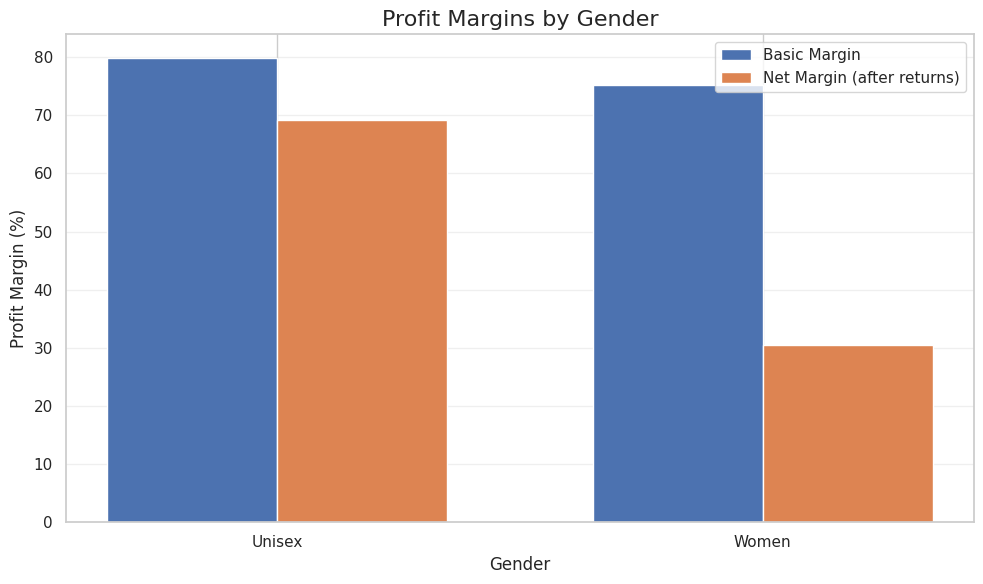

In [ ]:
# Profitability by gender segment
gender_profit = df.groupby('gender').agg({
    'customer_paid_amount': 'sum',
    'basic_profit': 'sum',
    'net_profit': 'sum',
    'is_returned': lambda x: x.mean() * 100,
    'tax_loss': 'sum',
    'order_number': 'count'
}).rename(columns={
    'customer_paid_amount': 'revenue',
    'is_returned': 'return_rate',
    'order_number': 'order_count'
})

gender_profit['basic_margin'] = (gender_profit['basic_profit'] / gender_profit['revenue']) * 100
gender_profit['net_margin'] = (gender_profit['net_profit'] / gender_profit['revenue']) * 100
gender_profit['margin_impact'] = gender_profit['basic_margin'] - gender_profit['net_margin']
gender_profit['tax_impact'] = (gender_profit['tax_loss'] / gender_profit['revenue']) * 100

print("\n===== PROFITABILITY BY GENDER =====")
print(gender_profit[['revenue', 'net_profit', 'net_margin', 'return_rate', 'tax_impact', 'order_count']])

# Visualize gender profitability
plt.figure(figsize=(10, 6))
x = np.arange(len(gender_profit.index))
width = 0.35

plt.bar(x - width/2, gender_profit['basic_margin'], width, label='Basic Margin')
plt.bar(x + width/2, gender_profit['net_margin'], width, label='Net Margin (after returns)')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.title('Profit Margins by Gender', fontsize=16)
plt.xticks(x, gender_profit.index)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


===== MOST PROFITABLE STATES =====
                revenue  net_profit  net_margin  return_rate  tax_impact  \
customer_state                                                             
TR             10103.01     6998.73       69.27        33.33        0.00   
PY             13071.02     8612.38       65.89        20.00        0.03   
MZ              7175.01     4288.63       59.77        33.33        0.05   
SK              6096.01     3511.54       57.60        14.29        0.07   
MN             18825.03     9493.95       50.43        31.25        0.11   

                order_count  
customer_state               
TR                        9  
PY                       10  
MZ                        6  
SK                        7  
MN                       16  

===== LEAST PROFITABLE STATES =====
                 revenue  net_profit  net_margin  return_rate  tax_impact  \
customer_state                                                              
DL             863043.67   198

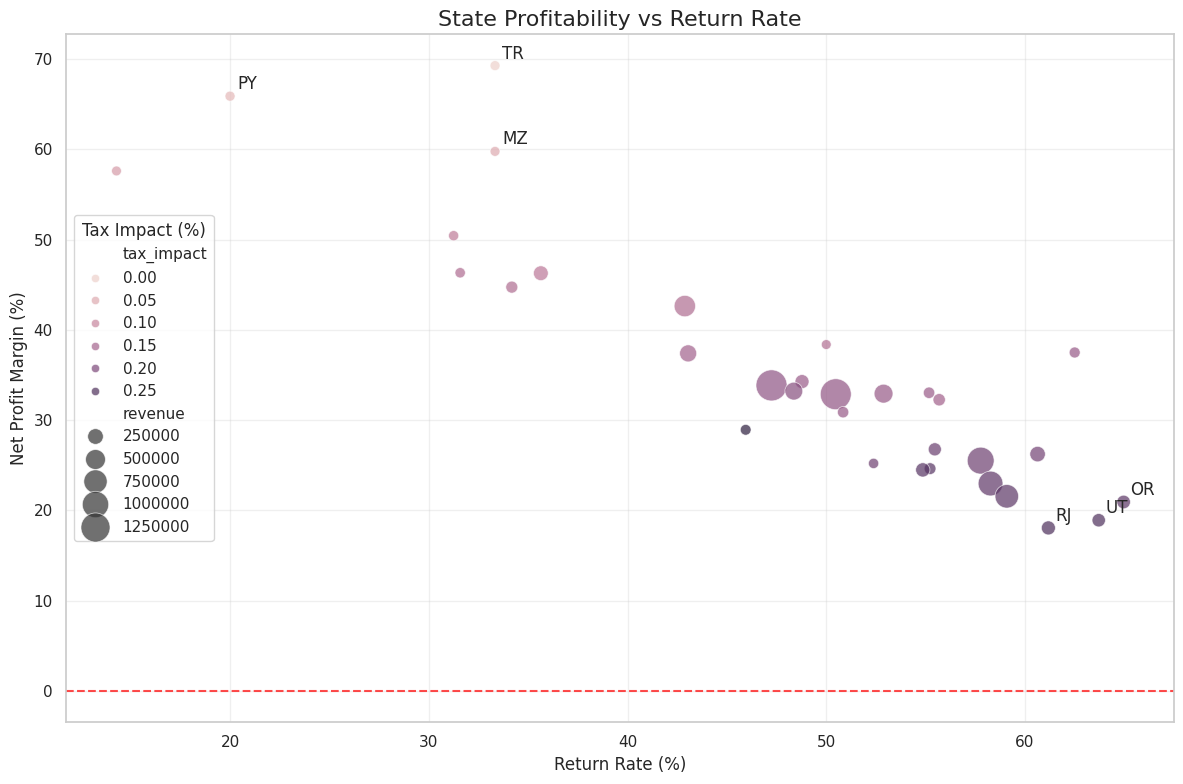

In [ ]:
# Profitability by state
state_profit = df.groupby('customer_state').agg({
    'customer_paid_amount': 'sum',
    'basic_profit': 'sum',
    'net_profit': 'sum',
    'is_returned': lambda x: x.mean() * 100,
    'tax_loss': 'sum',
    'order_number': 'count'
}).rename(columns={
    'customer_paid_amount': 'revenue',
    'is_returned': 'return_rate',
    'order_number': 'order_count'
})

state_profit['basic_margin'] = (state_profit['basic_profit'] / state_profit['revenue']) * 100
state_profit['net_margin'] = (state_profit['net_profit'] / state_profit['revenue']) * 100
state_profit['margin_impact'] = state_profit['basic_margin'] - state_profit['net_margin']
state_profit['tax_impact'] = (state_profit['tax_loss'] / state_profit['revenue']) * 100

# Filter states with significant volume
significant_states = state_profit[state_profit['order_count'] >= 5].sort_values('net_margin', ascending=False)

print("\n===== MOST PROFITABLE STATES =====")
print(significant_states.head(5)[['revenue', 'net_profit', 'net_margin', 'return_rate', 'tax_impact', 'order_count']])

print("\n===== LEAST PROFITABLE STATES =====")
print(significant_states.tail(5)[['revenue', 'net_profit', 'net_margin', 'return_rate', 'tax_impact', 'order_count']])

# Visualize state profitability vs return rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=significant_states.reset_index(),
                x='return_rate', y='net_margin',
                size='revenue', sizes=(50, 500),
                alpha=0.7, hue='tax_impact')

plt.title('State Profitability vs Return Rate', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.legend(title='Tax Impact (%)')

# Annotate some key states
for idx, row in significant_states.head(3).reset_index().iterrows():
    plt.annotate(row['customer_state'],
                 xy=(row['return_rate'], row['net_margin']),
                 xytext=(5, 5), textcoords='offset points')

for idx, row in significant_states.tail(3).reset_index().iterrows():
    plt.annotate(row['customer_state'],
                 xy=(row['return_rate'], row['net_margin']),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


===== RETURN REASONS AND PROFIT IMPACT =====
                    return_count  percent_of_returns  loss_per_return  \
return_type                                                             
return_refund               2999               69.65          -456.39   
release_rto_refund           810               18.81           670.97   
exchange                     497               11.54           671.75   

                    tax_per_return  
return_type                         
return_refund                 5.97  
release_rto_refund            0.00  
exchange                      0.00  


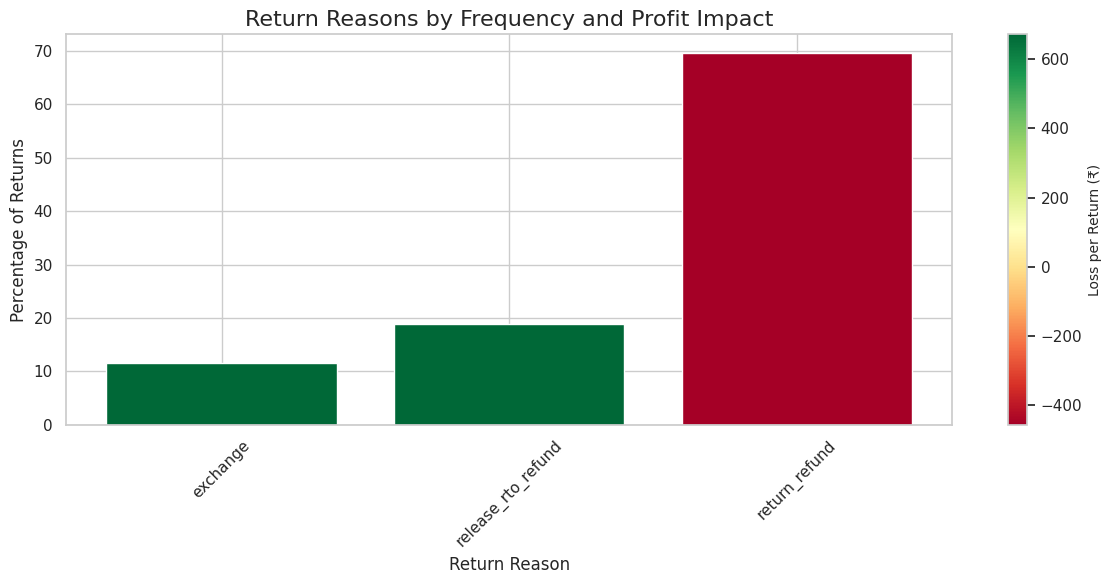

In [ ]:
# Analyze return reasons and their profit impact
if 'return_type' in df.columns and df['return_type'].notna().sum() > 0:
    return_reason_profit = df[df['is_returned']].groupby('return_type').agg({
        'customer_paid_amount': 'sum',
        'net_profit': 'sum',
        'tax_loss': 'sum',
        'order_number': 'count'
    }).rename(columns={
        'customer_paid_amount': 'revenue',
        'order_number': 'return_count'
    })

    return_reason_profit['loss_per_return'] = return_reason_profit['net_profit'] / return_reason_profit['return_count']
    return_reason_profit['percent_of_returns'] = return_reason_profit['return_count'] / return_reason_profit['return_count'].sum() * 100
    return_reason_profit['tax_per_return'] = return_reason_profit['tax_loss'] / return_reason_profit['return_count']

    print("\n===== RETURN REASONS AND PROFIT IMPACT =====")
    print(return_reason_profit.sort_values('loss_per_return')[['return_count', 'percent_of_returns', 'loss_per_return', 'tax_per_return']])

    # Visualize return reasons by frequency and profit impact
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create a color map based on loss per return
    norm = plt.Normalize(return_reason_profit['loss_per_return'].min(),
                         return_reason_profit['loss_per_return'].max())
    colors = plt.cm.RdYlGn(norm(return_reason_profit['loss_per_return']))

    bars = ax.bar(return_reason_profit.index,
                 return_reason_profit['percent_of_returns'],
                 color=colors)

    ax.set_title('Return Reasons by Frequency and Profit Impact', fontsize=16)
    ax.set_xlabel('Return Reason', fontsize=12)
    ax.set_ylabel('Percentage of Returns', fontsize=12)
    plt.xticks(rotation=45)

    # Add a colorbar to show the profit impact scale
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)  # Specify the axes for the colorbar
    cbar.set_label('Loss per Return (₹)', fontsize=10)

    plt.tight_layout()
    plt.show()


===== RETURN RATE AND PROFITABILITY BY PRICE RANGE =====
             return_rate  avg_price  avg_profit  profit_margin  tax_per_order  \
price_range                                                                     
0-500              39.34     439.90      166.69          37.89           0.74   
501-1000           52.38     902.64      278.40          30.84           1.74   
1001-2000          51.83    1646.48      494.07          30.01           3.19   
2001-5000          47.62    2362.33     1034.51          43.79           3.57   
5000+                NaN        NaN         NaN            NaN            NaN   

             order_count  
price_range               
0-500                122  
501-1000            5678  
1001-2000           2458  
2001-5000             21  
5000+                  0  


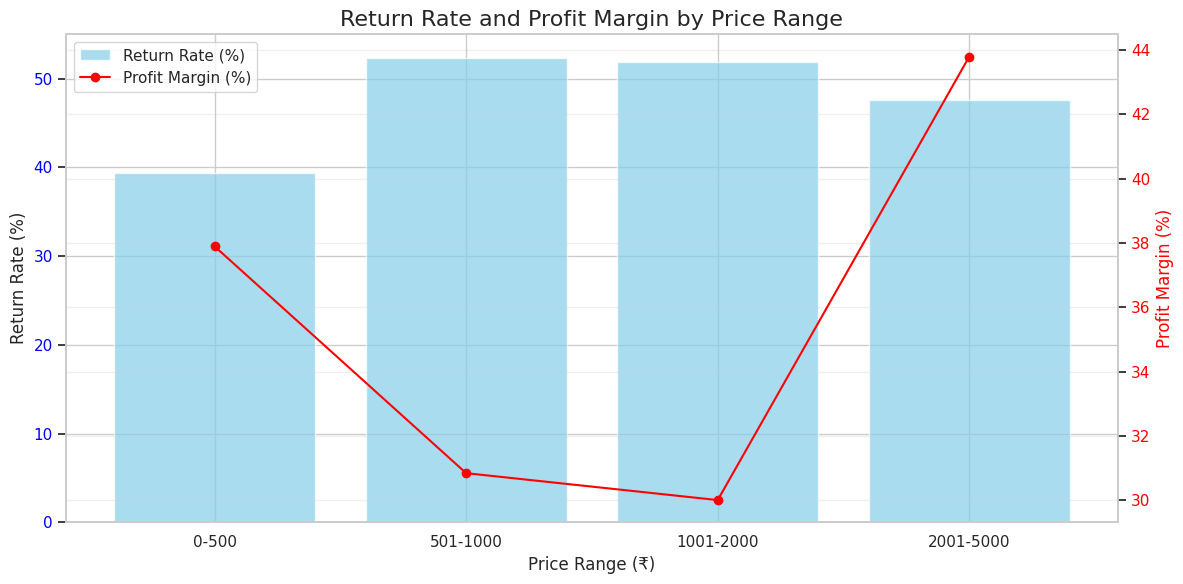

In [ ]:
# Analyze factors associated with high returns
# Create bins for price ranges
df['price_range'] = pd.cut(df['customer_paid_amount'],
                          bins=[0, 500, 1000, 2000, 5000, float('inf')],
                          labels=['0-500', '501-1000', '1001-2000', '2001-5000', '5000+'])

# Return rate and profitability by price range
price_returns = df.groupby('price_range').agg({
    'is_returned': lambda x: x.mean() * 100,
    'customer_paid_amount': 'mean',
    'net_profit': 'mean',
    'tax_loss': 'mean',
    'order_number': 'count'
}).rename(columns={
    'is_returned': 'return_rate',
    'customer_paid_amount': 'avg_price',
    'net_profit': 'avg_profit',
    'order_number': 'order_count'
})

price_returns['tax_per_order'] = price_returns['tax_loss']
price_returns['profit_margin'] = (price_returns['avg_profit'] / price_returns['avg_price']) * 100

print("\n===== RETURN RATE AND PROFITABILITY BY PRICE RANGE =====")
print(price_returns[['return_rate', 'avg_price', 'avg_profit', 'profit_margin', 'tax_per_order', 'order_count']])

# Visualize price range analysis
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)

# Plot return rate and profit margin
bars = ax1.bar(price_returns.index, price_returns['return_rate'], alpha=0.7, color='skyblue', label='Return Rate (%)')
ax1.set_ylabel('Return Rate (%)', fontsize=12)
ax1.set_xlabel('Price Range (₹)', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line = ax2.plot(price_returns.index, price_returns['profit_margin'], marker='o', color='red', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Return Rate and Profit Margin by Price Range', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


===== RETURN RATE AND PROFITABILITY BY DISCOUNT RANGE =====
                return_rate  avg_discount  avg_profit  profit_margin  \
discount_range                                                         
0-10%                 58.97          9.45      336.38          22.31   
11-30%                54.55         13.44      541.81          33.62   
31-50%                52.66         43.94      386.97          30.08   
51-70%                52.25         55.42      325.06          30.65   
71-100%               17.20         82.32      298.54          63.23   

                tax_per_order  order_count  
discount_range                              
0-10%                    3.82           39  
11-30%                   2.62           33  
31-50%                   2.67         2277  
51-70%                   1.98         5837  
71-100%                  0.32           93  


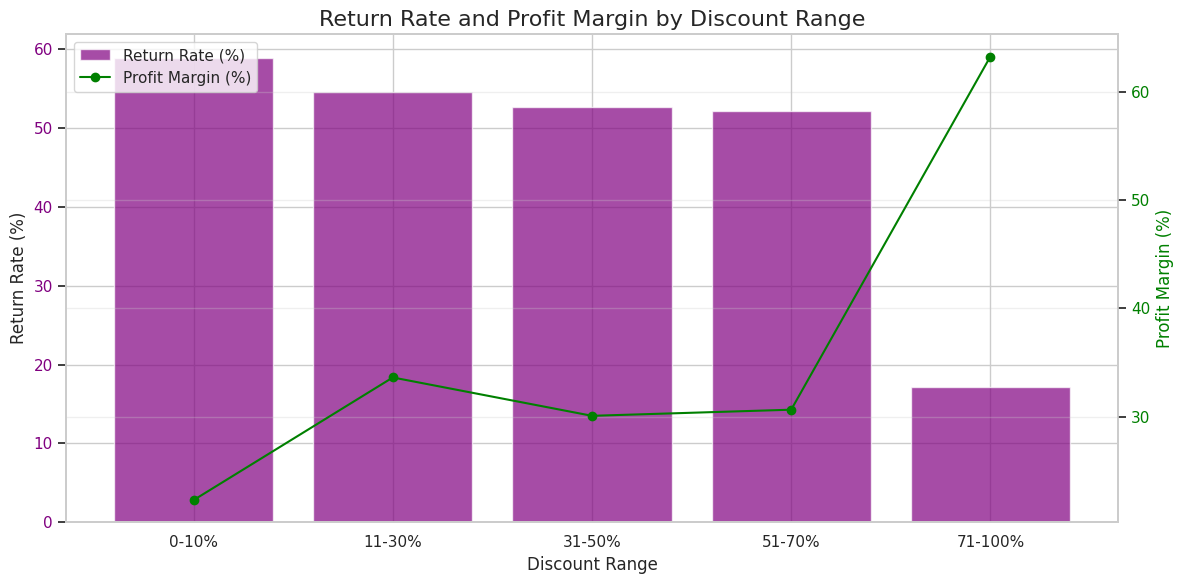

In [ ]:
# Return rate by discount percentage
df['discount_percentage'] = (df['discount_amount'] / df['mrp']) * 100
df['discount_range'] = pd.cut(df['discount_percentage'],
                             bins=[0, 10, 30, 50, 70, 100],
                             labels=['0-10%', '11-30%', '31-50%', '51-70%', '71-100%'])

discount_returns = df.groupby('discount_range').agg({
    'is_returned': lambda x: x.mean() * 100,
    'discount_percentage': 'mean',
    'net_profit': 'mean',
    'customer_paid_amount': 'mean',
    'tax_loss': 'mean',
    'order_number': 'count'
}).rename(columns={
    'is_returned': 'return_rate',
    'discount_percentage': 'avg_discount',
    'net_profit': 'avg_profit',
    'customer_paid_amount': 'avg_price',
    'order_number': 'order_count'
})

discount_returns['profit_margin'] = (discount_returns['avg_profit'] / discount_returns['avg_price']) * 100
discount_returns['tax_per_order'] = discount_returns['tax_loss']

print("\n===== RETURN RATE AND PROFITABILITY BY DISCOUNT RANGE =====")
print(discount_returns[['return_rate', 'avg_discount', 'avg_profit', 'profit_margin', 'tax_per_order', 'order_count']])

# Visualize discount range analysis
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)

# Plot return rate and profit margin
bars = ax1.bar(discount_returns.index, discount_returns['return_rate'], alpha=0.7, color='purple', label='Return Rate (%)')
ax1.set_ylabel('Return Rate (%)', fontsize=12)
ax1.set_xlabel('Discount Range', fontsize=12)
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
line = ax2.plot(discount_returns.index, discount_returns['profit_margin'], marker='o', color='green', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Return Rate and Profit Margin by Discount Range', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


===== PROFITABILITY BY DELIVERY PERFORMANCE =====
              return_rate  net_profit  profit_margin  tax_per_order  \
delay_range                                                           
Very Early          47.56      290.41          25.91           2.49   
Early               46.58      314.36          28.02           2.35   
On Time             45.38      329.62          29.35           2.32   
Slight Delay        45.45      478.20          42.51           1.40   
Major Delay         80.00      400.78          36.09           1.51   

              avg_revenue  order_count  
delay_range                             
Very Early        1120.63         2992  
Early             1121.91         4180  
On Time           1122.87          249  
Slight Delay      1124.77           22  
Major Delay       1110.60            5  


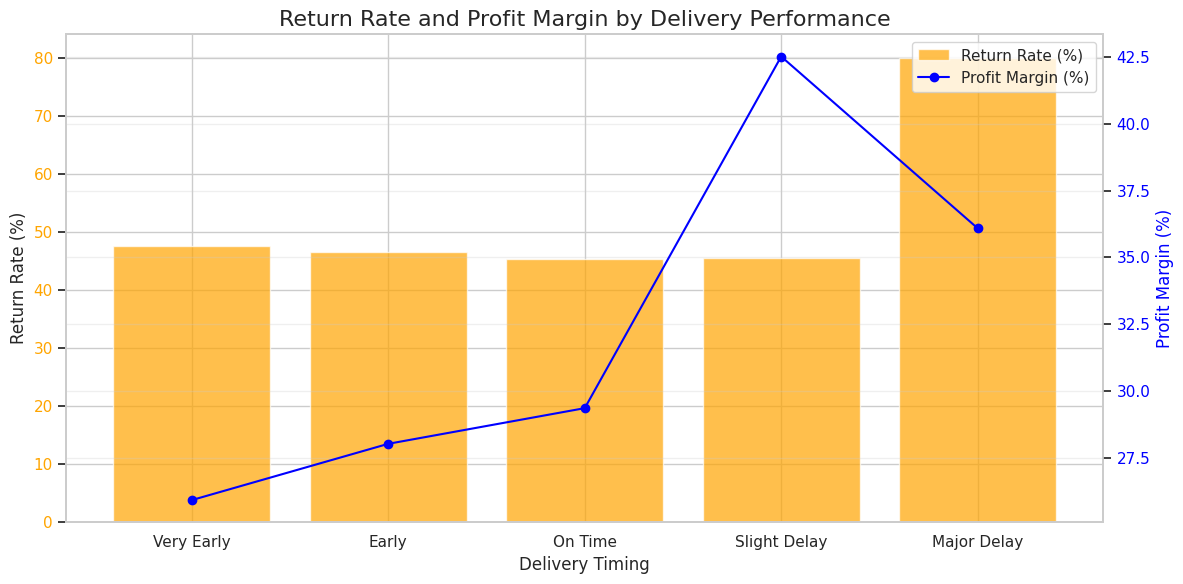

In [ ]:
# Analyze profitability by delivery performance
df['delivery_delay'] = (df['actual_delivery_date'] - df['promised_delivery_date']).dt.days
df['delay_range'] = pd.cut(df['delivery_delay'],
                          bins=[-float('inf'), -2, 0, 2, 5, float('inf')],
                          labels=['Very Early', 'Early', 'On Time', 'Slight Delay', 'Major Delay'])

delay_profit = df.groupby('delay_range').agg({
    'is_returned': lambda x: x.mean() * 100,
    'net_profit': 'mean',
    'customer_paid_amount': 'mean',
    'tax_loss': 'mean',
    'order_number': 'count'
}).rename(columns={
    'is_returned': 'return_rate',
    'customer_paid_amount': 'avg_revenue',
    'order_number': 'order_count'
})

delay_profit['profit_margin'] = (delay_profit['net_profit'] / delay_profit['avg_revenue']) * 100
delay_profit['tax_per_order'] = delay_profit['tax_loss']

print("\n===== PROFITABILITY BY DELIVERY PERFORMANCE =====")
print(delay_profit[['return_rate', 'net_profit', 'profit_margin', 'tax_per_order', 'avg_revenue', 'order_count']])

# Visualize delivery performance impact
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)

bars = ax1.bar(delay_profit.index, delay_profit['return_rate'], alpha=0.7, color='orange', label='Return Rate (%)')
ax1.set_ylabel('Return Rate (%)', fontsize=12)
ax1.set_xlabel('Delivery Timing', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
line = ax2.plot(delay_profit.index, delay_profit['profit_margin'], marker='o', color='blue', label='Profit Margin (%)')
ax2.set_ylabel('Profit Margin (%)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Return Rate and Profit Margin by Delivery Performance', fontsize=16)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

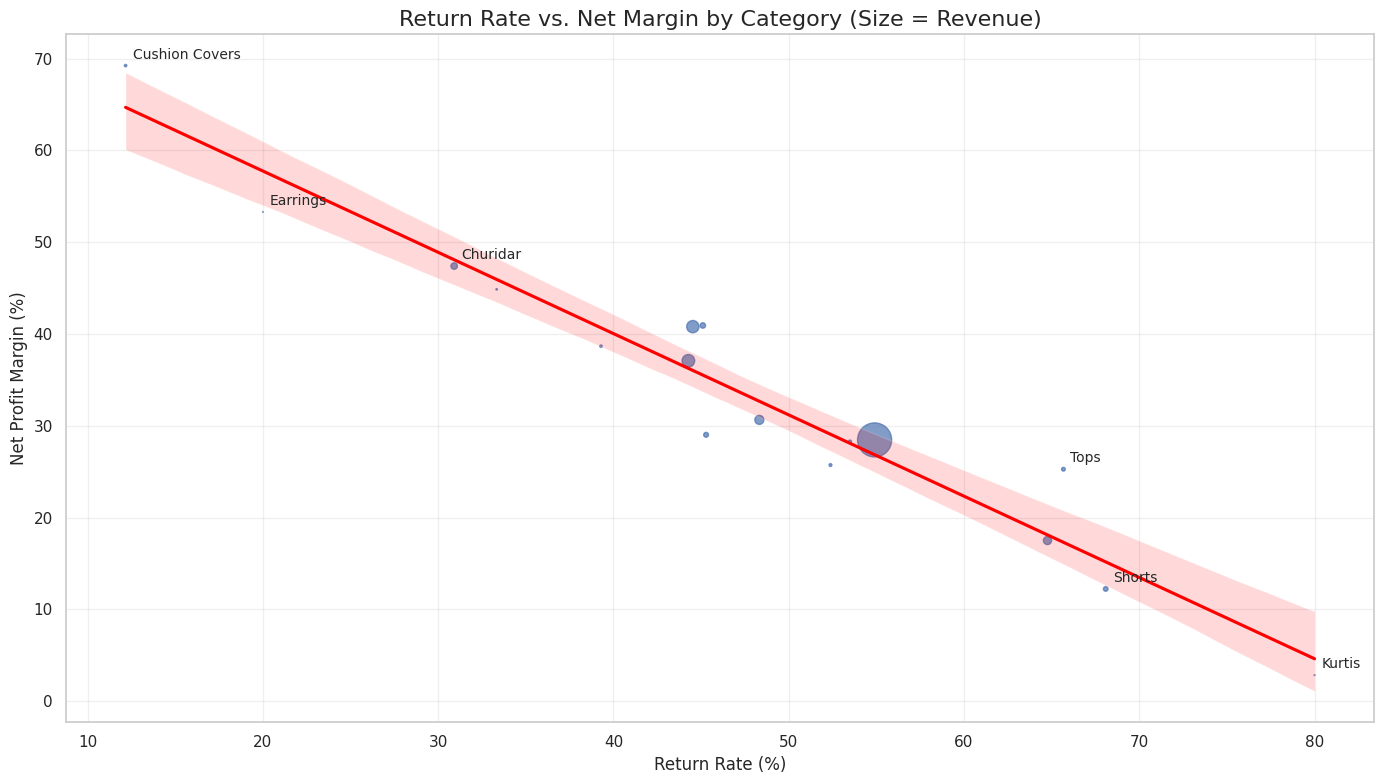

Correlation between return rate and net margin: -0.97


In [ ]:
# Create a scatter plot with regression line to visualize relationship
plt.figure(figsize=(14, 8))
sns.regplot(x='return_rate', y='net_margin', data=significant_categories.reset_index(),
           scatter_kws={'s': significant_categories['revenue']/10000, 'alpha': 0.7},
           line_kws={'color': 'red'})

plt.title('Return Rate vs. Net Margin by Category (Size = Revenue)', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate categories with extreme values
for idx, row in significant_categories.nlargest(3, 'net_margin').iterrows():
    plt.annotate(idx, xy=(row['return_rate'], row['net_margin']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

for idx, row in significant_categories.nlargest(3, 'return_rate').iterrows():
    plt.annotate(idx, xy=(row['return_rate'], row['net_margin']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = significant_categories[['return_rate', 'net_margin']].corr().iloc[0,1]
print(f"Correlation between return rate and net margin: {correlation:.2f}")

In [ ]:
# Analyze return reasons by top product categories
if 'return_type' in df.columns:
    top_categories = significant_categories.index[:5].tolist() + significant_categories.index[-5:].tolist()

    for category in top_categories:
        category_returns = df[(df['article_type'] == category) & df['is_returned']]['return_type'].value_counts(normalize=True) * 100
        print(f"\nReturn Reasons for {category}:")
        print(category_returns)


Return Reasons for Cushion Covers:
return_type
return_refund        77.78
release_rto_refund   22.22
Name: proportion, dtype: float64

Return Reasons for Earrings:
return_type
return_refund   100.00
Name: proportion, dtype: float64

Return Reasons for Churidar:
return_type
return_refund        76.47
release_rto_refund   17.65
exchange              5.88
Name: proportion, dtype: float64

Return Reasons for Kurtas:
return_type
return_refund        75.00
release_rto_refund   25.00
Name: proportion, dtype: float64

Return Reasons for Shirts:
return_type
return_refund        59.42
exchange             23.19
release_rto_refund   17.39
Name: proportion, dtype: float64

Return Reasons for Skirts:
return_type
return_refund        75.00
release_rto_refund   15.91
exchange              9.09
Name: proportion, dtype: float64

Return Reasons for Tops:
return_type
return_refund        59.09
release_rto_refund   29.55
exchange             11.36
Name: proportion, dtype: float64

Return Reasons for Co-O


Return Rate (%) by Price Range and Discount Level:
discount_range  0-10%  11-30%  31-50%  51-70%  71-100%
price_range                                           
0-500             NaN     NaN     NaN   51.22    15.00
501-1000          NaN     NaN   53.99   52.37    18.87
1001-2000       58.97   56.25   51.35   51.94      NaN
2001-5000         NaN    0.00     NaN   50.00      NaN


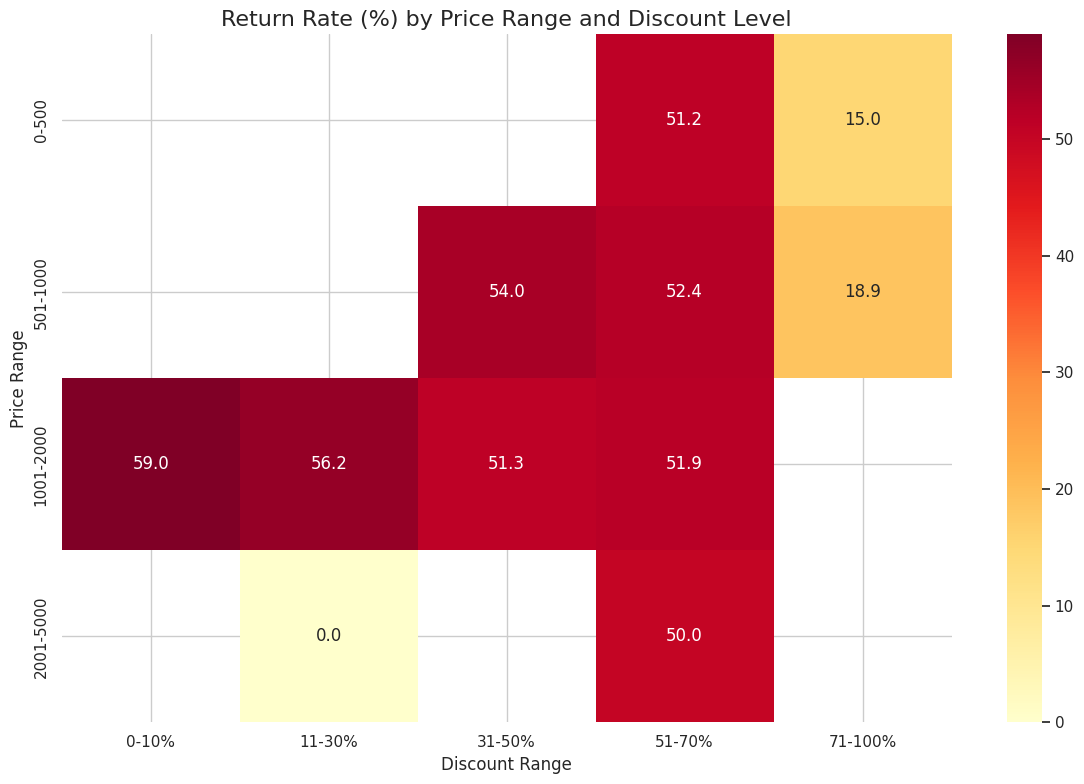

In [ ]:
# Create a cross-tabulation of price range vs discount range
price_discount_returns = pd.crosstab(
    df['price_range'],
    df['discount_range'],
    values=df['is_returned'],
    aggfunc='mean'
) * 100

print("\nReturn Rate (%) by Price Range and Discount Level:")
print(price_discount_returns)

# Visualize the relationship
plt.figure(figsize=(12, 8))
sns.heatmap(price_discount_returns, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Return Rate (%) by Price Range and Discount Level', fontsize=16)
plt.xlabel('Discount Range', fontsize=12)
plt.ylabel('Price Range', fontsize=12)
plt.tight_layout()
plt.show()

Created delivery_days column


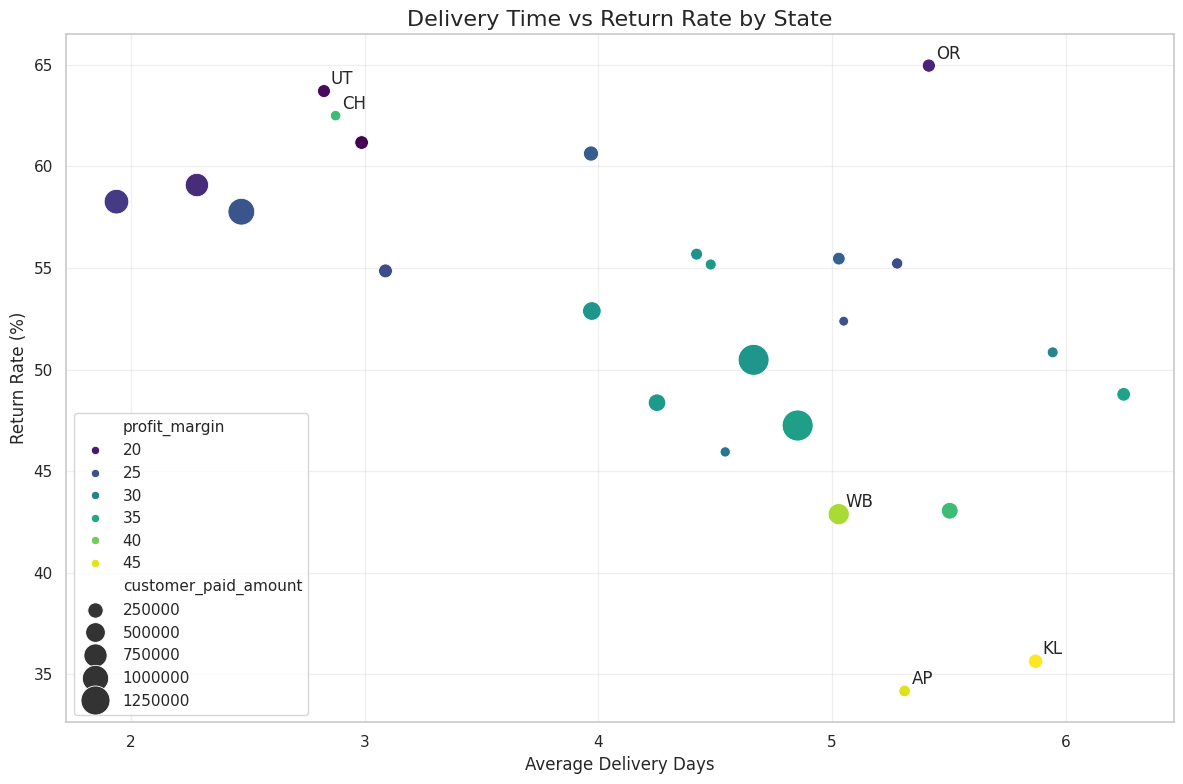

In [ ]:
# First ensure we have the delivery_days column
if 'delivery_days' not in df.columns:
    df['delivery_days'] = (df['actual_delivery_date'] - df['order_date']).dt.days
    print("Created delivery_days column")

# Calculate average delivery time by state
state_delivery = df.groupby('customer_state').agg({
    'delivery_days': 'mean',
    'is_returned': 'mean',
    'net_profit': 'sum',
    'customer_paid_amount': 'sum',
    'order_number': 'count'
})

state_delivery['return_rate'] = state_delivery['is_returned'] * 100
state_delivery['profit_margin'] = (state_delivery['net_profit'] / state_delivery['customer_paid_amount']) * 100

# Filter states with significant order volume
significant_states_delivery = state_delivery[state_delivery['order_number'] >= 20]

# Visualize relationship between delivery time and return rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='delivery_days', y='return_rate',
                size='customer_paid_amount', sizes=(50, 500),
                hue='profit_margin', palette='viridis',
                data=significant_states_delivery)

plt.title('Delivery Time vs Return Rate by State', fontsize=16)
plt.xlabel('Average Delivery Days', fontsize=12)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate key states
for idx, row in significant_states_delivery.nlargest(3, 'return_rate').iterrows():
    plt.annotate(idx, xy=(row['delivery_days'], row['return_rate']),
                xytext=(5, 5), textcoords='offset points')

for idx, row in significant_states_delivery.nsmallest(3, 'return_rate').iterrows():
    plt.annotate(idx, xy=(row['delivery_days'], row['return_rate']),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze return rates by day of week
df['order_day_of_week'] = df['order_date'].dt.dayofweek
df['order_day_name'] = df['order_date'].dt.day_name()

day_of_week_returns = df.groupby('order_day_name').agg({
    'is_returned': 'mean',
    'net_profit': 'sum',
    'customer_paid_amount': 'sum',
    'order_number': 'count'
})

day_of_week_returns['return_rate'] = day_of_week_returns['is_returned'] * 100
day_of_week_returns['profit_margin'] = (day_of_week_returns['net_profit'] / day_of_week_returns['customer_paid_amount']) * 100

# Reorder days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_returns = day_of_week_returns.reindex(days_order)

print("\nReturn Rate and Profitability by Day of Week:")
print(day_of_week_returns[['return_rate', 'profit_margin', 'order_number']])


Return Rate and Profitability by Day of Week:
                return_rate  profit_margin  order_number
order_day_name                                          
Monday                53.28          27.53          1203
Tuesday               50.93          32.60          1186
Wednesday             54.18          29.83          1159
Thursday              52.71          29.92          1070
Friday                50.28          34.48          1070
Saturday              51.57          31.09          1212
Sunday                51.16          29.42          1378


In [ ]:
# Analyze impact of Try and Buy on returns
if 'is_try_and_buy' in df.columns:
    try_buy_returns = df.groupby('is_try_and_buy').agg({
        'is_returned': 'mean',
        'net_profit': 'mean',
        'customer_paid_amount': 'mean',
        'order_number': 'count'
    })

    try_buy_returns['return_rate'] = try_buy_returns['is_returned'] * 100
    try_buy_returns['profit_margin'] = (try_buy_returns['net_profit'] / try_buy_returns['customer_paid_amount']) * 100

    print("\nTry and Buy Impact on Returns and Profitability:")
    print(try_buy_returns[['return_rate', 'profit_margin', 'order_number']])


Try and Buy Impact on Returns and Profitability:
                return_rate  profit_margin  order_number
is_try_and_buy                                          
False                 52.01          30.59          8279


In [ ]:
# Analyze high-return categories in more detail
high_return_categories = significant_categories[significant_categories['return_rate'] > 0.1].index.tolist()

for category in high_return_categories:
    category_data = df[df['article_type'] == category]

    # Return rate by price point within category
    category_price_returns = category_data.groupby('price_range').agg({
        'is_returned': 'mean',
        'customer_paid_amount': 'mean',
        'order_number': 'count'
    })

    category_price_returns['return_rate'] = category_price_returns['is_returned'] * 100

    print(f"\nReturn Rate by Price Range for {category}:")
    print(category_price_returns[['return_rate', 'customer_paid_amount', 'order_number']])


Return Rate by Price Range for Cushion Covers:
             return_rate  customer_paid_amount  order_number
price_range                                                 
0-500              15.00                318.75            40
501-1000            8.82                540.00            34
1001-2000            NaN                   NaN             0
2001-5000            NaN                   NaN             0
5000+                NaN                   NaN             0

Return Rate by Price Range for Earrings:
             return_rate  customer_paid_amount  order_number
price_range                                                 
0-500                NaN                   NaN             0
501-1000           20.00                599.00             5
1001-2000            NaN                   NaN             0
2001-5000            NaN                   NaN             0
5000+                NaN                   NaN             0

Return Rate by Price Range for Churidar:
             r

In [ ]:
# Create a DataFrame that combines popularity and profitability metrics
article_analysis = significant_categories.reset_index()
article_analysis = article_analysis.sort_values('order_count', ascending=False)

# Display the results
print("ARTICLE TYPE ANALYSIS: POPULARITY VS. PROFITABILITY")
print("="*80)
print(f"{'Article Type':<20} {'Count':<10} {'Revenue (₹)':<15} {'Net Profit (₹)':<15} {'Margin %':<10} {'Return %':<10}")
print("-"*80)

for _, row in article_analysis.iterrows():
    print(f"{row['article_type']:<20} {row['order_count']:<10} {row['revenue']:,.2f} {row['net_profit']:,.2f} {row['net_margin']:<10.2f} {row['return_rate']:<10.2f}")

ARTICLE TYPE ANALYSIS: POPULARITY VS. PROFITABILITY
Article Type         Count      Revenue (₹)     Net Profit (₹)  Margin %   Return %  
--------------------------------------------------------------------------------
Saree Blouse         5481       6,032,676.36 1,717,098.83 28.46      54.90     
Palazzos             777        826,812.55 306,630.60 37.09      44.27     
Salwar               676        783,294.98 319,624.47 40.81      44.53     
Dresses              298        425,223.54 130,313.56 30.65      48.32     
Co-Ords              210        347,152.16 60,764.10 17.50      64.76     
Churidar             165        220,479.78 104,517.25 47.40      30.91     
Shirts               153        152,503.26 62,423.34 40.93      45.10     
Harem Pants          106        122,062.27 35,423.02 29.02      45.28     
Shorts               94         112,269.95 13,729.29 12.23      68.09     
Skirts               84         42,516.16 10,937.79 25.73      52.38     
Cushion Covers       74

In [ ]:
# Create a DataFrame that combines popularity and profitability metrics
article_analysis = significant_categories.reset_index()
article_analysis = article_analysis.sort_values('order_count', ascending=False)

# Create a clean DataFrame with just the columns we want to display
display_df = article_analysis[['article_type', 'order_count', 'revenue', 'net_profit', 'net_margin', 'return_rate']]

# Rename columns for clarity
display_df = display_df.rename(columns={
    'article_type': 'Article Type',
    'order_count': 'Count',
    'revenue': 'Revenue (₹)',
    'net_profit': 'Net Profit (₹)',
    'net_margin': 'Margin %',
    'return_rate': 'Return %'
})

# Display the DataFrame - this will show as a proper table in Colab
display_df

,Article Type,Count,Revenue (₹),Net Profit (₹),Margin %,Return %
10,Saree Blouse,5481,6032676.36,1717098.83,28.46,54.90
7,Palazzos,777,826812.55,306630.60,37.09,44.27
5,Salwar,676,783294.98,319624.47,40.81,44.53
8,Dresses,298,425223.54,130313.56,30.65,48.32
14,Co-Ords,210,347152.16,60764.10,17.50,64.76
2,Churidar,165,220479.78,104517.25,47.40,30.91
4,Shirts,153,152503.26,62423.34,40.93,45.10
9,Harem Pants,106,122062.27,35423.02,29.02,45.28
15,Shorts,94,112269.95,13729.29,12.23,68.09
12,Skirts,84,42516.16,10937.79,25.73,52.38


In [ ]:
!pip install XlsxWriter

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

# Create a writer with xlsxwriter engine
writer = pd.ExcelWriter('ecommerce_dashboard.xlsx', engine='xlsxwriter')

# Export data tables
significant_categories.to_excel(writer, sheet_name='Dashboard', startrow=1, startcol=0)
state_delivery.head(10).to_excel(writer, sheet_name='Dashboard', startrow=1, startcol=10)

# Get the workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Dashboard']

# Add a title
worksheet.write('A1', 'E-commerce Business Analysis Dashboard')

# Create a chart for return rates by category
chart1 = workbook.add_chart({'type': 'column'})

# Configure the series for the top 5 categories by return rate
for i in range(5):
    chart1.add_series({
        'name':       ['Dashboard', i+2, 0],
        'categories': ['Dashboard', i+2, 0, i+2, 0],
        'values':     ['Dashboard', i+2, 3, i+2, 3],
    })

# Configure chart
chart1.set_title({'name': 'Return Rates by Top Categories'})
chart1.set_x_axis({'name': 'Category'})
chart1.set_y_axis({'name': 'Return Rate (%)'})

# Insert the chart into the worksheet
worksheet.insert_chart('A20', chart1, {'x_scale': 1.5, 'y_scale': 1.5})

# Add more charts as needed...

# Close the writer
writer.close()

# Download the file
from google.colab import files
files.download('ecommerce_dashboard.xlsx')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 5.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>